# Winnie Ekwegh

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from IPython.display import Image, display
import numpy as np
import missingno as msno
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
image_path = '/content/drive/MyDrive/Netflix_folder/netflix_logo.png'
csv_path = '/content/drive/MyDrive/Netflix_folder/netflix_data.csv'

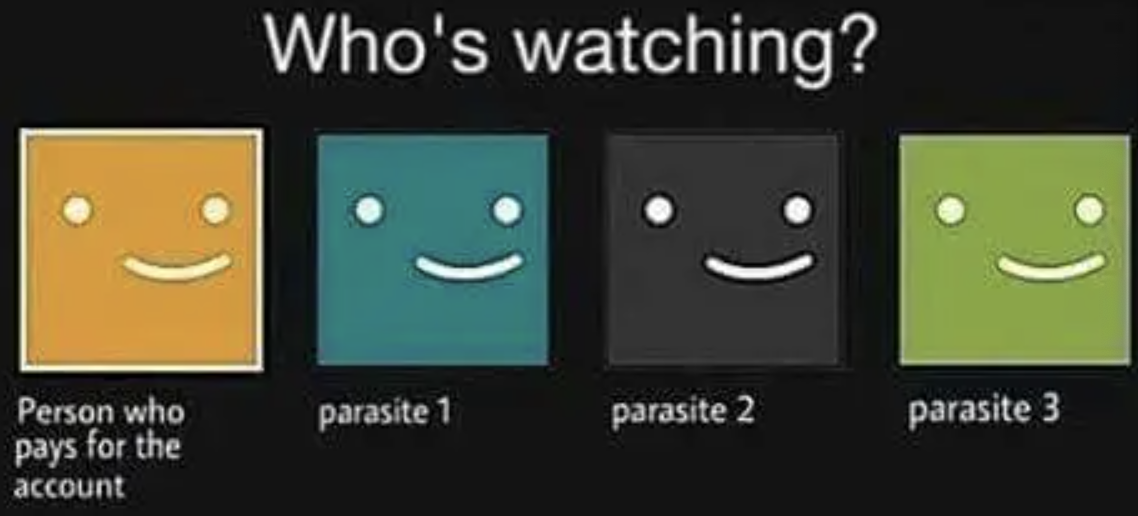

In [82]:
img = Image.open(image_path)
display(img)

<h2 style="color:Black;">An Exploratory Data Analysis on Netflix Movies and TV Shows</h2>

# Introduction

In recent years, digital streaming platforms like Netflix have changed how we watch entertainment. With their huge collections of movies and TV shows, these platforms have transformed the entertainment world. This project embarks on an exploratory journey into the world of Netflix movies and TV shows.Our aim is to discover interesting insights into the variety and growth of Netflix's movie and TV shows catalog.

# Fun Facts About Netflix

* **Binge-Watching Pioneer**: Netflix popularized the concept of binge-watching. The release of entire seasons at once started with the show "House of Cards" in 2013, letting viewers watch multiple episodes in one sitting.

* **Hidden Codes**: Netflix has thousands of secret genre codes that can unlock specific categories, like "Action & Adventure based on a book" or "Critically-acclaimed Romantic Foreign Movies." Users can access these by tweaking the URL (e.g., www.netflix.com/browse/genre/INSERTCODE).

* **First Original Series**: Netflix's first-ever original series was "Lilyhammer," released in 2012. It starred Steven Van Zandt, known for his role in "The Sopranos," as a New York gangster starting a new life in Norway.

* **Data-Driven Content**: Netflix uses big data and algorithms to decide what content to produce. The decision to create "House of Cards" was based on the data indicating that viewers who liked the original British series also enjoyed films with Kevin Spacey and movies directed by David Fincher.

* **Record-Breaking Subscriptions**: As of 2024, Netflix has over 230 million subscribers worldwide, making it one of the largest streaming platforms globally. Its extensive library includes content in various languages, catering to a diverse international audience.

# Objectives

* Comprehensive Data Exploration: Investigate the distribution and characteristics of movies across genres, release years, and production countries.
* Directorial and Cast Analysis: Identify prominent directors and popular cast members within Netflix's offerings.
* Temporal Trends: Analyze patterns in the addition of movies over time to understand Netflix's content acquisition strategies.
* Content Attributes: Explore the distribution of movie ratings and typical durations available on Netflix.

# Potential Uses and Applications

* Enhance content recommendations and personalization algorithms to improve user
engagement.
* Provide insights to content creators and studios about current trends and audience
demands.
* Inform Netflix's content acquisition strategy based on genre popularity.
* Provide insightful answers to queries posed by curious minds or avid Netflix enthusiasts.

# Data Sources and Preliminary Analysis

Data Source: Netflix dataset from Kaggle – ["Netflix Movies and TV Shows"](https://www.kaggle.com/datasets/shivamb/netflix-shows)

In [85]:
nd = pd.read_csv(csv_path)
nd.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [84]:
nd.shape

(8807, 12)

In [28]:
nd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [29]:
nd.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Visualization of Missing Values

In [30]:
nd.nunique()

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


In [31]:
nd.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


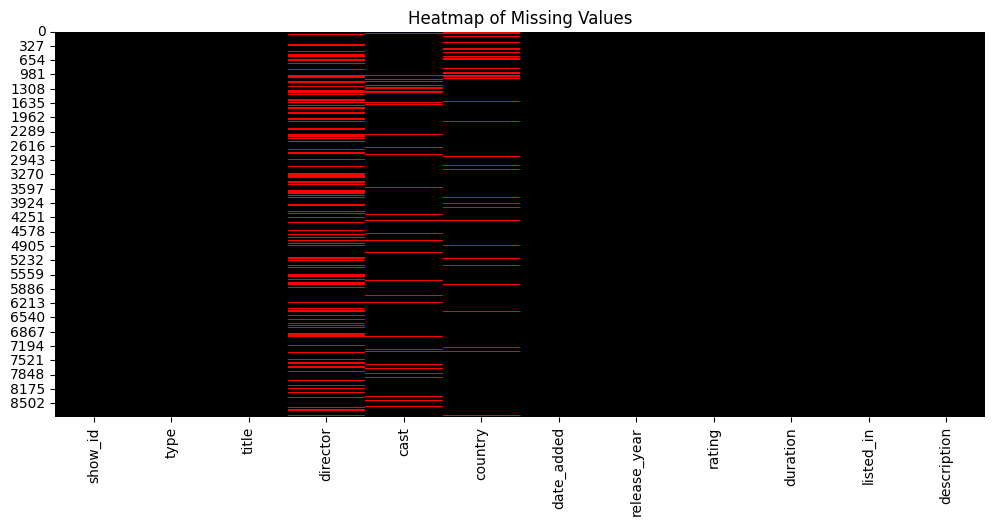

In [32]:
# Define a custom colormap
colors = ['black', 'red']  # Red for missing, black for present
cmap = LinearSegmentedColormap.from_list('black_red', colors, N=2)

# Plotting missing values as a heatmap with the custom colormap
plt.figure(figsize=(12, 5))
sns.heatmap(nd.isnull(), cbar=False, cmap=cmap)
plt.title('Heatmap of Missing Values')
plt.show()

In [33]:
# Additional plots to display missing values
# msno.bar(nd)
# plt.show()
# msno.matrix(nd)

In [34]:
# Calculate the percentage of missing values for each column
missing_percentage = nd.isnull().mean() * 100

# Filter columns with missing values greater than zero
missing_percentage = missing_percentage[missing_percentage > 0]

# Round the percentages to two decimal places and format with a percentage sign
missing_percentage = missing_percentage.round(2).astype(str) + '%'
missing_percentage

,0
director,29.91%
cast,9.37%
country,9.44%
date_added,0.11%
rating,0.05%
duration,0.03%


<h1 style="color:Black;">Data Cleaning</h1>

* **For the "director" and "cast" column, I decided to replace the missing values with "not listed".**

In [35]:
# Replace missing values in the 'director' column with "not listed"
nd['director'] = nd['director'].fillna('not listed')

In [36]:
# Replace missing values in the 'cast' column with "not listed"
nd['cast'] = nd['cast'].fillna('not listed')

* **For the "country" column, I assumed that the first country listed is the primary country, so I decided to only use the first country listed and then fill all the NAN's with "not listed."**

In [37]:
# Function to get the first country or return "not listed" if NaN
def get_first_country(country_list):
    if pd.isnull(country_list) or country_list.strip() == '':
        return 'not listed'
    return country_list.split(',')[0].strip()

# Apply the function to the 'country' column
nd['country'] = nd['country'].apply(get_first_country)

* **For the "date_added", "rating" and "duration" column, I decided to drop the NAN's since they were few.**

In [38]:
# Drop rows where 'date_added' column has NaN values
nd = nd.dropna(subset=['date_added'])
# Drop rows where 'rating' column has NaN values
nd = nd.dropna(subset=['rating'])
# Drop rows where 'duration' column has NaN values
nd = nd.dropna(subset=['duration'])

In [39]:
nd.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [40]:
nd.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,not listed,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,not listed,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",not listed,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,not listed,not listed,not listed,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,not listed,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


* **Next, I converted the "date_added" to datetime format and I extracted the month and the year into new columns.**

In [41]:
# Ensure the 'date_added' column is in string format
nd['date_added'] = nd['date_added'].astype(str)

# Extract month and year from 'date_added'
nd['month_added'] = nd['date_added'].apply(lambda x: x.split(' ')[0])
nd['year_added'] = nd['date_added'].apply(lambda x: x.split(', ')[1])

In [42]:
nd.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,not listed,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021


<h1 style="color:Black;">A closer look at the "ratings"</h1>

In [43]:
nd['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

# <h1 style="color:Black;">Understanding Content Ratings: What Each Rating Means</h1>

* **PG-13 (Parental Guidance-13) - Some material may be inappropriate for children under 13.**

* **TV-MA (Television Mature Audiences) - Intended for adults only. May contain explicit content including strong language, sexual content, or graphic violence.**

* **PG (Parental Guidance) - Some material may not be suitable for children. Parents are encouraged to provide supervision.**

* **TV-14 (Television-14) - May be inappropriate for children under 14. Contains some content that parents might find unsuitable for younger children.**

* **TV-PG (Television Parental Guidance) - Parental guidance is suggested. Content may be inappropriate for younger children.**

* **TV-Y (Television-Y) - Suitable for all children. Contains little or no objectionable content.**

* **TV-Y7 (Television-Y7) - Suitable for children aged 7 and older. May contain mild fantasy or comedic elements that might not be suitable for younger children.**

* **R (Restricted) - Restricted to viewers over 17 or 18. May contain strong language, sexual content, or intense violence.**

* **TV-G (Television-General Audience) - Suitable for all audiences. No content that would be considered inappropriate.**

* **G (General Audience) - Suitable for general audiences. Content is appropriate for all ages.**

* **NC-17 (No One 17 and Under Admitted) - No one 17 and under is admitted. Contains explicit content, often including graphic sexual content.**

* **NR (Not Rated) - Content has not been submitted for a rating or is not yet rated. Parents should use their discretion.**

* **TV-Y7-FV (Television-Y7-Fantasy Violence) - Suitable for children aged 7 and older, but contains fantasy violence that may be frightening or intense for younger viewers.**

* **UR (Unrated) - Content that has not been submitted for a formal rating or does not have a rating.**

<h1 style="color:Black;">Streamlining the ratings to 5 targeted age groups</h1>

* **Tiny Tots (Ages 0-5): Includes 'G', 'TV-Y', and 'TV-G'. Content in this category is ideal for very young children, featuring simple stories and educational content.**

* **Kids (Ages 6-12): Combines 'TV-Y7-FV', 'PG', and 'TV-PG'. Suitable for children who are a bit older and can handle more complex themes but still need age-appropriate content.**

* **Tweens & Teens (Ages 10-17): Covers 'TV-14' and 'PG-13'. This category targets pre-teens and teenagers with content that includes more mature themes and complex stories.**

* **Young Adults (Ages 16-25): Encompasses 'R', 'TV-MA', and 'UR'. Designed for older teens and young adults, featuring content with mature themes, strong language, and explicit scenes.**

* **Adults (Ages 18+): Includes 'NC-17' and 'NR'. Reserved for mature audiences, featuring adult content that is often provocative or challenging.**

In [44]:
# Define the new ratings to age group mapping
ratings_ages = {
    'G': 'Tiny Tots',
    'TV-Y': 'Tiny Tots',
    'TV-G': 'Tiny Tots',
    'TV-Y7': 'Kids',
    'TV-Y7-FV': 'Kids',
    'PG': 'Kids',
    'TV-PG': 'Kids',
    'TV-14': 'Tweens & Teens',
    'PG-13': 'Tweens & Teens',
    'R': 'Adults',
    'TV-MA': 'Adults',
    'UR': 'Adults',
    'NC-17': 'Adults',
    'NR': 'Adults',
}
# Apply the mapping to the 'rating' column in your dataframe
nd['target_audience'] = nd['rating'].map(ratings_ages)
nd['target_audience'].unique()

array(['Tweens & Teens', 'Adults', 'Kids', 'Tiny Tots'], dtype=object)

In [45]:
nd.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,target_audience
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,not listed,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021,Tweens & Teens


In [46]:
nd.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [47]:
# Changing the data type
# Converting 'type' and 'target_audience' to categorical data type
nd['type'] = nd['type'].astype('category')
nd['target_audience'] = nd['target_audience'].astype('category')
# Convert to 'year_added' to an integer
nd['year_added'] = nd['year_added'].astype(int)

In [48]:
nd.dtypes

,0
show_id,object
type,category
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


<h1 style="color:Black;">Some Data Visualizations</h1>

In [49]:
type = nd['type'].value_counts().reset_index()
type.head()

,type,count
0,Movie,6126
1,TV Show,2664


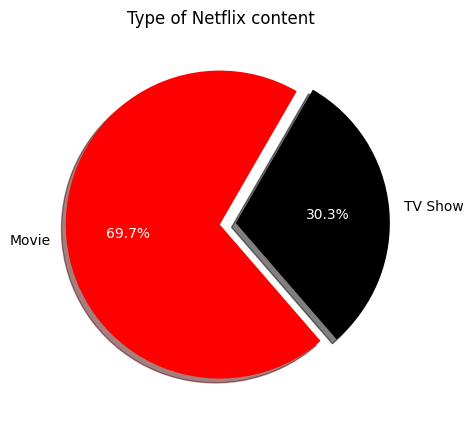

In [50]:
# Count the occurrences of each type
type_counts = nd['type'].value_counts()

# Define colors: red and black
colors = ['red', 'black'] * (len(type_counts) // 2 + 1)

# Eject the first slice with a larger offset
explode = [0.1] * len(type_counts)
explode[0] = 0.005

# Create a 2D pie chart
fig, ax = plt.subplots(figsize=(7, 5))
wedges, texts, autotexts = ax.pie(type_counts, labels=type_counts.index, colors=colors, explode=explode, autopct='%1.1f%%', startangle=60, shadow=True)

# Improve the appearance of the chart
for autotext in autotexts:
    autotext.set_color('white')
for text in texts:
    text.set_color('black')

# Title
ax.set_title('Type of Netflix content')
plt.show()

**Almost two-thirds of the contents on Netflix are movies, while the rest are TV shows.**

In [51]:
# Get unique ratings for movies
unique_movie_ratings = nd[nd['type'] == 'Movie']['rating'].unique()

# Get unique ratings for TV shows
unique_tv_ratings = nd[nd['type'] == 'TV Show']['rating'].unique()

# Convert the ratings to sorted lists
unique_movie_ratings_sorted = sorted(unique_movie_ratings)
unique_tv_ratings_sorted = sorted(unique_tv_ratings)

# Create a DataFrame for better display
ratings_df = pd.DataFrame({
    'Unique Movie Ratings': unique_movie_ratings_sorted,
    'Unique TV Show Ratings': unique_tv_ratings_sorted + [''] * (len(unique_movie_ratings_sorted) - len(unique_tv_ratings_sorted))
})
# Display the DataFrame
ratings_df

,Unique Movie Ratings,Unique TV Show Ratings
0,G,NR
1,NC-17,R
2,NR,TV-14
3,PG,TV-G
4,PG-13,TV-MA
5,R,TV-PG
6,TV-14,TV-Y
7,TV-G,TV-Y7
8,TV-MA,TV-Y7-FV
9,TV-PG,


In [52]:
# Create a DataFrame 'nd_tv' containing only the rows where the 'type' is "TV Show"
nd_tv = nd[nd["type"] == "TV Show"]
# Create a DataFrame 'nd_mv' containing only the rows where the 'type' is "Movie"
nd_mv = nd[nd["type"] == "Movie"]

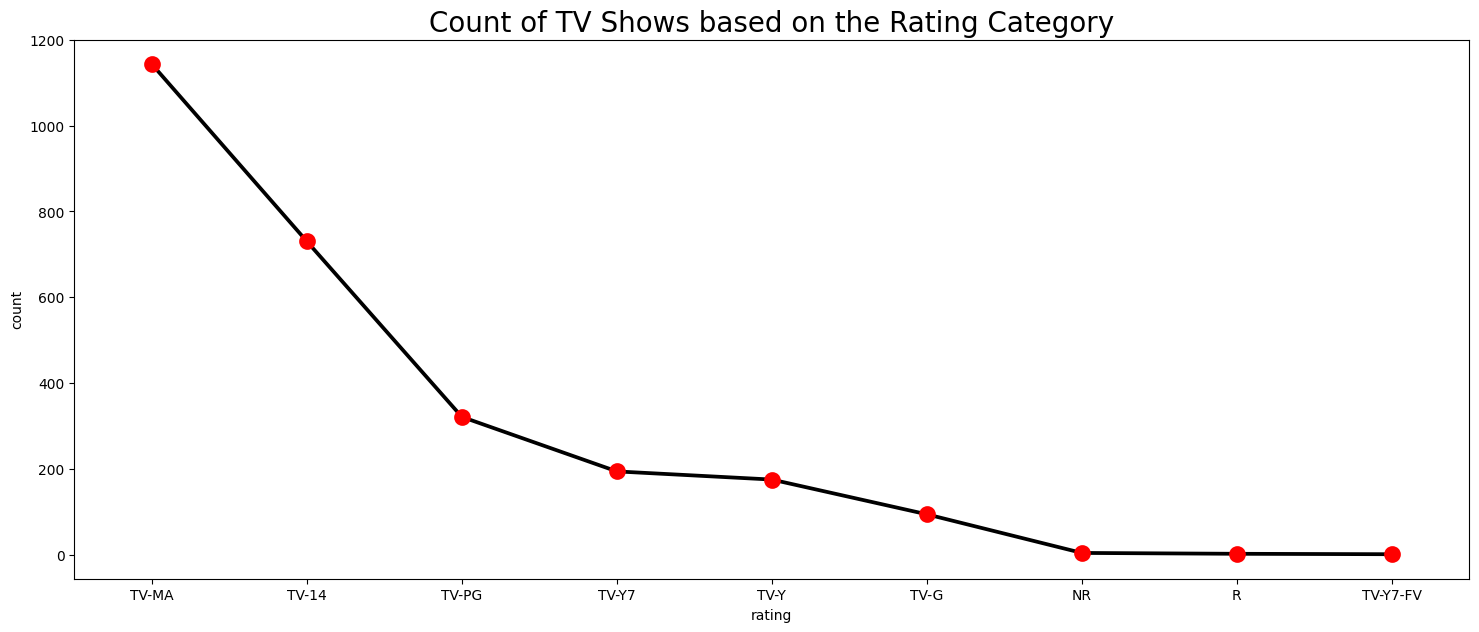

In [53]:
# Group the data by 'rating' and count the number of 'show_id' for each rating
tvshow_ratings = nd_tv.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count', ascending=False)

# Set the dimensions for the figure
fig_dims = (18, 7)
fig, ax = plt.subplots(figsize=fig_dims)

# Create a point plot using seaborn
sns.pointplot(x='rating', y='count', data=tvshow_ratings, color='black')

# Customize the markers
for line in ax.lines:
    line.set_marker("o")
    line.set_markerfacecolor("red")
    line.set_markeredgecolor("red")
    line.set_markersize(10)

# Add a title to the plot
plt.title('Count of TV Shows based on the Rating Category', size='20')

# Display the plot
plt.show()

* **TV Shows rated TV-MA have the most content**

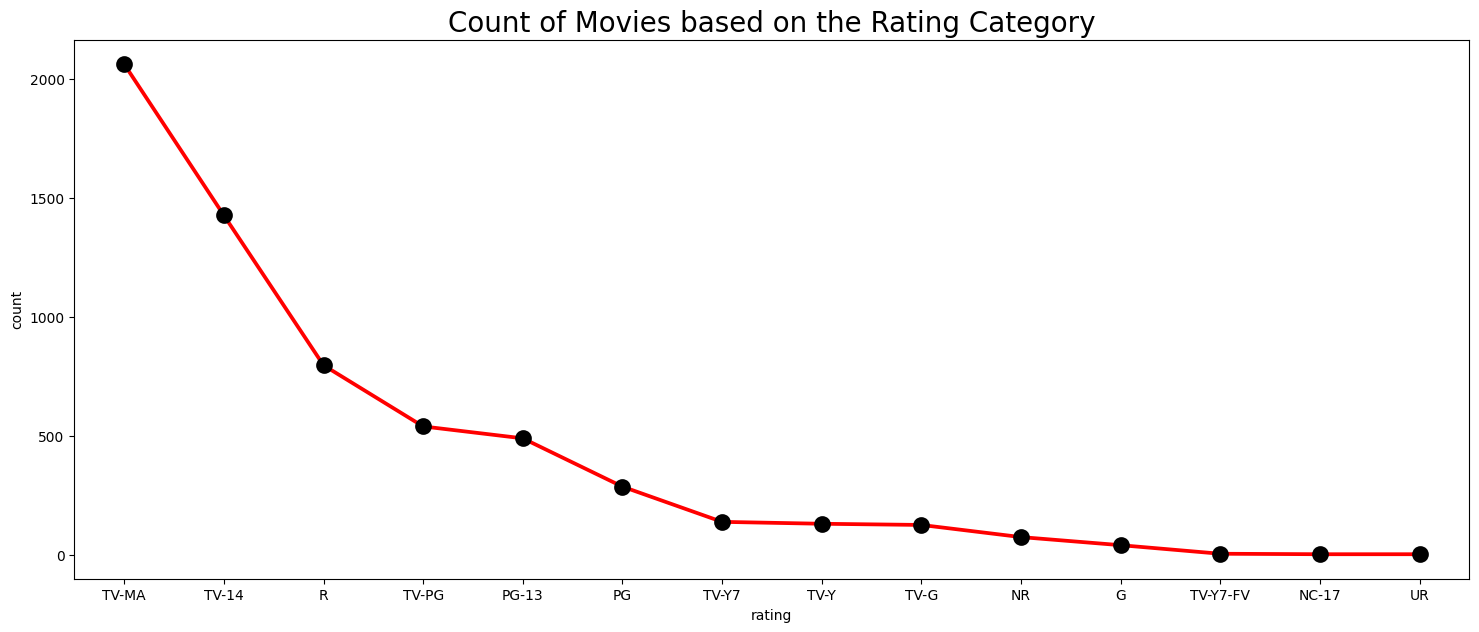

In [54]:
# Group the data by 'rating' and count the number of 'show_id' for each rating
movie_ratings = nd_mv.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count', ascending=False)

# Set the dimensions for the figure
fig_dims = (18, 7)
fig, ax = plt.subplots(figsize=fig_dims)

# Create a point plot using seaborn
sns.pointplot(x='rating', y='count', data=movie_ratings, color='red')

# Customize the markers
for line in ax.lines:
    line.set_marker("o")
    line.set_markerfacecolor("black")
    line.set_markeredgecolor("black")
    line.set_markersize(10)

# Add a title to the plot
plt.title('Count of Movies based on the Rating Category', size='20')

# Display the plot
plt.show()

* **Movies rated TV-MA have the most content**

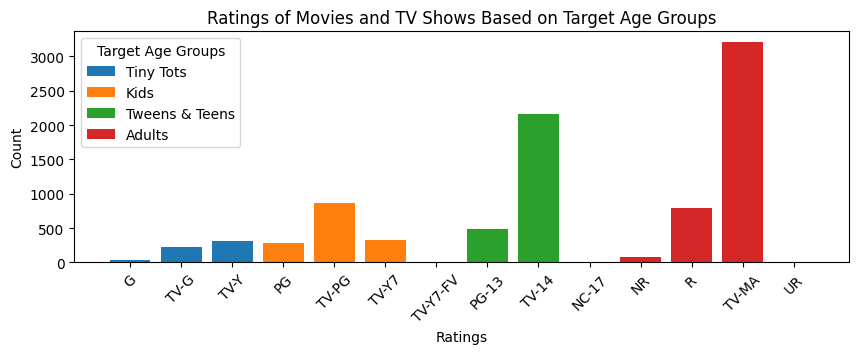

In [55]:
# Define the custom order for target audiences
custom_order = {
    'Tiny Tots': 0,
    'Kids': 1,
    'Tweens & Teens': 2,
    'Adults': 3
}
# Ensure 'target_audience' is ordered by the custom order
nd['target_audience'] = nd['target_audience'].map(custom_order)

# Group by 'rating' and 'target_audience', and count occurrences
rating_df = nd.groupby(['rating', 'target_audience']).size().reset_index(name='counts')

# Ensure 'rating' is ordered by the custom order defined in ratings_ages
rating_df['target_audience'] = rating_df['rating'].map(ratings_ages).map(custom_order)

# Sort by target_audience and rating
rating_df = rating_df.sort_values(['target_audience', 'rating'])

# Create a bar plot
plt.figure(figsize=(10, 3))
for label in custom_order.keys():
    subset = rating_df[rating_df['target_audience'] == custom_order[label]]
    plt.bar(subset['rating'], subset['counts'], label=label)

plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Ratings of Movies and TV Shows Based on Target Age Groups')
plt.legend(title='Target Age Groups')
plt.xticks(rotation=45)
plt.show()

* **In general, movies for adults seems to have the most content.**

In [56]:
# Define the rating orders
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'PG', 'TV-PG', 'PG-13', 'TV-14', 'TV-MA', 'R', 'NC-17','NR','UR']
rating_order_tv =  [ 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'NR', 'TV-MA']

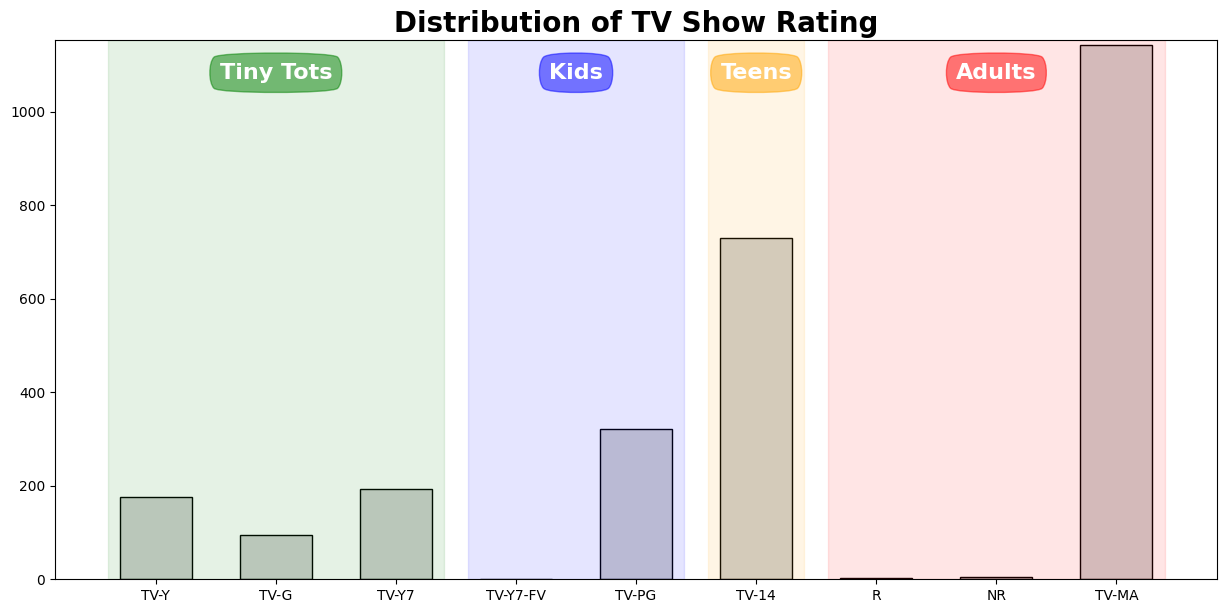

In [57]:
# Get the count of ratings for movies and TV shows
movie_rating = nd[nd['type'] == 'Movie']['rating'].value_counts().reindex(rating_order_movie, fill_value=0)
tv_rating = nd[nd['type'] == 'TV Show']['rating'].value_counts().reindex(rating_order_tv, fill_value=0)

def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1, 1, figsize=(15, 7))

    # Set height limit if provided
    if h_lim:
        ax.set_ylim(0, h_lim)

    # Create the bar plot
    ax.bar(data.index, data, color="#d0d0d0", width=0.6, edgecolor='black')

    # Define colors and span ranges
    colors = ['green', 'blue', 'orange', 'red']
    span_ranges = [[0, 2], [3, 4], [5,5], [6, 8]]

    # Annotate the plot with categories
    for idx, (color, span_range, sub_title) in enumerate(zip(colors, span_ranges, ['Tiny Tots', 'Kids', 'Teens', 'Adults'])):
        ax.annotate(sub_title,
                    xy=(sum(span_range) / 2, height),
                    xytext=(0, -20), textcoords='offset points',  # Adjusted xytext to move annotations down
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.5, color=color, alpha=0.5))
        ax.axvspan(span_range[0] - 0.4, span_range[1] + 0.4, color=color, alpha=0.1
                  )
    # Set the title of the plot
    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.03))
    plt.show()
# Plot the TV show ratings
rating_barplot(tv_rating, "TV Show", tv_rating.max(), tv_rating.max() + 10)

* **Adult-rated TV shows appear to have the most content compared to other categories.**

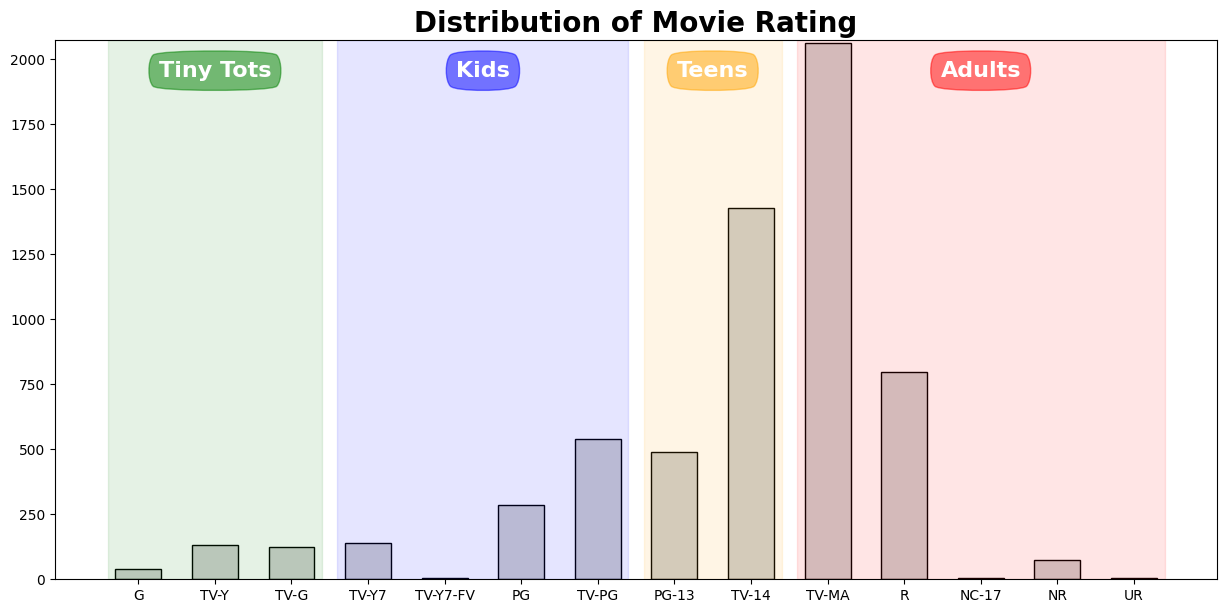

In [58]:
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1, 1, figsize=(15, 7))

    # Set height limit if provided
    if h_lim:
        ax.set_ylim(0, h_lim)

    # Create the bar plot
    ax.bar(data.index, data, color="#d0d0d0", width=0.6, edgecolor='black')

    # Define colors and span ranges
    colors = ['green', 'blue', 'orange', 'red']
    span_ranges = [[0, 2], [3, 6], [7, 8], [9, 13]]

    # Annotate the plot with categories
    for idx, (color, span_range, sub_title) in enumerate(zip(colors, span_ranges, ['Tiny Tots', 'Kids', 'Teens', 'Adults'])):
        ax.annotate(sub_title,
                    xy=(sum(span_range) / 2, height),
                    xytext=(0, -20), textcoords='offset points',  # Adjusted xytext to move annotations down
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.5, color=color, alpha=0.5))
        ax.axvspan(span_range[0] - 0.4, span_range[1] + 0.4, color=color, alpha=0.1
                  )

    # Set the title of the plot
    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.03))
    plt.show()
# Plot the movie ratings
rating_barplot(movie_rating, "Movie", movie_rating.max(), movie_rating.max() + 10)

* **There are significantly fewer movies categorized for Tiny Tots compared to the number available for Adults and Teens.**

In [59]:
import plotly.express as px
movie_rating = nd_mv['rating'].value_counts().reindex(rating_order_movie, fill_value=0)
tv_rating = nd_tv['rating'].value_counts().reindex(rating_order_tv, fill_value=0)

# Create DataFrames
movie_df = pd.DataFrame({'rating': rating_order_movie, 'count': movie_rating, 'type': 'Movies'})
tvshow_df = pd.DataFrame({'rating': rating_order_tv, 'count': tv_rating, 'type': 'TV Shows'})

# Combine DataFrames
combined_df = pd.concat([movie_df, tvshow_df])

# Plotly bar chart with custom colors
fig = px.bar(combined_df, x='rating', y='count', color='type', barmode='stack',
             title='Distribution of Ratings for Movies and TV Shows',
             labels={'count': 'Count', 'rating': 'Rating'},
             color_discrete_map={'Movies': 'purple', 'TV Shows': 'gold'})

# Customize layout for white background and gray grid
fig.update_layout(
    xaxis_title='Rating',
    yaxis_title='Count',
    plot_bgcolor='white',  # Set the plot background to white
    paper_bgcolor='white',  # Set the overall background to white
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgray'  # Set the y-axis grid color to gray
    )
)
# Show the figure
fig.show()

In [60]:
movie_rating = nd_mv['rating'].value_counts().reindex(rating_order_movie, fill_value=0)
tv_rating = nd_tv['rating'].value_counts().reindex(rating_order_tv, fill_value=0)

# Create DataFrames
movie_df = pd.DataFrame({'rating': rating_order_movie, 'count': movie_rating, 'type': 'Movies'})
tvshow_df = pd.DataFrame({'rating': rating_order_tv, 'count': tv_rating, 'type': 'TV Shows'})

# Combine DataFrames
combined_df = pd.concat([movie_df, tvshow_df])

# Create Sunburst Chart with custom colors
fig = px.sunburst(
    combined_df,
    path=['type', 'rating'],
    values='count',
    color='type',
    title='Distribution of Ratings for Movies and TV Shows',
    width=500,  # Adjust the width
    height=500,  # Adjust the height
    color_discrete_map={'Movies': 'orange', 'TV Shows': 'green'}
)

# Customize text info
fig.update_traces(textinfo='label+percent entry')
fig.show()

In [61]:
import plotly.graph_objects as go

# For total content
df_content = nd['year_added'].value_counts().reset_index()
df_content.columns = ['year_added', 'count']
df_content = df_content.sort_values('year_added')
df_content['percent'] = df_content['count'] * 100 / df_content['count'].sum()

# For TV shows
df_tv = nd[nd['type'] == 'TV Show']
df_tv1 = df_tv['year_added'].value_counts().reset_index()
df_tv1.columns = ['year_added', 'count']  # Explicitly rename columns
df_tv1 = df_tv1.sort_values('year_added')
df_tv1['percent'] = df_tv1['count'] * 100 / df_tv1['count'].sum()

# For Movies
df_movies = nd[nd['type'] == 'Movie']
df_movies1 = df_movies['year_added'].value_counts().reset_index()
df_movies1.columns = ['year_added', 'count']  # Explicitly rename columns
df_movies1 = df_movies1.sort_values('year_added')
df_movies1['percent'] = df_movies1['count'] * 100 / df_movies1['count'].sum()

# Create traces for the plot
t1 = go.Scatter(x=df_movies1['year_added'], y=df_movies1['count'], name='Movies', mode='lines+markers', marker=dict(color='orange'))
t2 = go.Scatter(x=df_tv1['year_added'], y=df_tv1['count'], name='TV Shows', mode='lines+markers', marker=dict(color='red'))
t3 = go.Scatter(x=df_content['year_added'], y=df_content['count'], name='Total Contents', mode='lines+markers', marker=dict(color='green'))

# Combine traces into a list
data = [t1, t2, t3]

# Define layout
layout = go.Layout(
    title='Content Added Over the Years',
    xaxis=dict(
        title='Year',
        gridcolor='lightgray'  # Set grid line color
    ),
    yaxis=dict(
        title='Count',
        gridcolor='lightgray'  # Set grid line color
    ),
    legend=dict(x=0.1, y=1.1, orientation='h'),
    plot_bgcolor='white',  # Set plot background color
    paper_bgcolor='white',  # Set paper background color
    width=900,  # Adjust width
    height=400   # Adjust height
)

# Create figure
fig = go.Figure(data=data, layout=layout)
fig.show()

* **According to this data, 2 contents were added in 2008.**
* **Between 2018 and 2019, 3,664 contents were added.**
* **In 2019, the highest number of new contents was added, including both Movies and TV shows.**

# Distribution of Movie and TV Show duration

In [62]:
# # Display unique release years in df_tv
#unique_release_years_tv = df_tv['release_year'].unique()
#print("Unique release years in TV shows:", unique_release_years_tv)

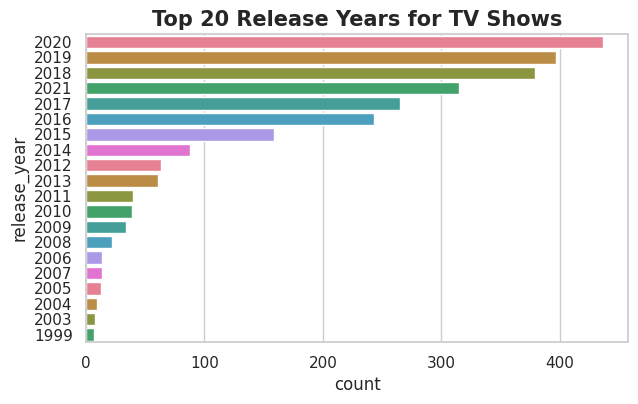

In [63]:
palette = sns.color_palette("husl", 8)  # Generates a bright palette with 8 colors

plt.figure(figsize=(7,4))
sns.set(style="whitegrid")
ax = sns.countplot(y="release_year", data=df_tv, palette=palette, order=df_tv['release_year'].value_counts().index[:20])

plt.title('Top 20 Release Years for TV Shows', fontsize=15, fontweight='bold')
plt.show()

* **The highest number of TV shows was released in 2020, with 2019 following closely behind.**

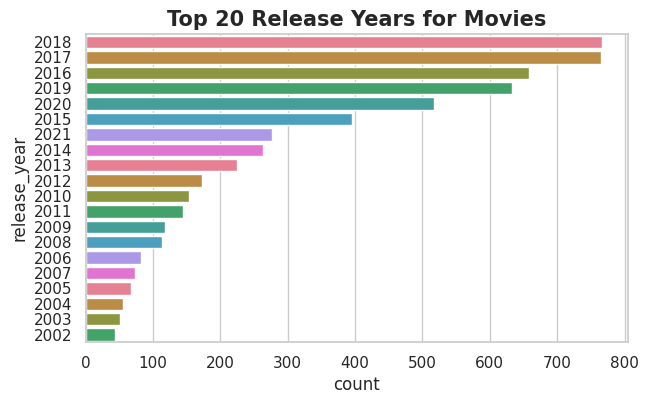

In [64]:
palette = sns.color_palette("husl", 8)

plt.figure(figsize=(7,4))
sns.set(style="whitegrid")
ax = sns.countplot(y="release_year", data=df_movies, palette=palette, order=df_movies['release_year'].value_counts().index[:20])

plt.title('Top 20 Release Years for Movies', fontsize=15, fontweight='bold')
plt.show()

* **The highest number of movies were released in 2018 and 2019.**

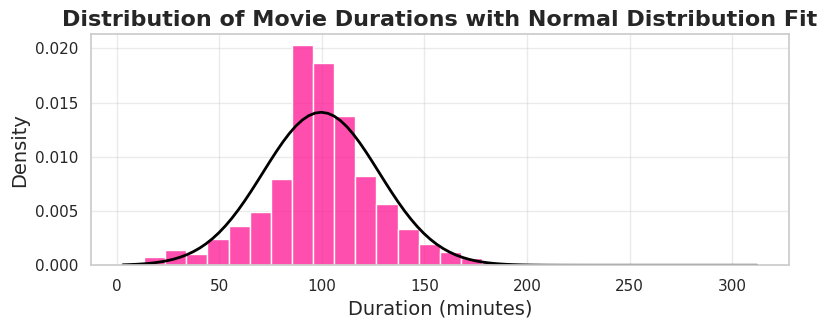

In [65]:
# Extract numerical values from the 'duration' column
df_movies['duration'] = df_movies['duration'].str.extract('(\d+)').astype(float)

# Define the figure size
plt.figure(figsize=(9, 3))

# Plot histogram with `histplot`
sns.histplot(df_movies['duration'], bins=30, color='#FF1493', kde=False, stat='density')

# Fit normal distribution
mu, std = norm.fit(df_movies['duration'].dropna())
xmin, xmax = df_movies['duration'].min(), df_movies['duration'].max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, color='black')

# Add title and labels
plt.title('Distribution of Movie Durations with Normal Distribution Fit', fontsize=16, fontweight='bold')
plt.xlabel('Duration (minutes)', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='-', alpha=0.4)
plt.show()

* **A plot of the histogram and the normal distribution curve above shows that the duration of most movies are around 90 to 100 minutes.**

In [66]:
import plotly.express as px

# Create histogram plot
fig = px.histogram(x=df_tv['duration'])

# Customize the layout and color
fig.update_layout(
    title="Distribution of TV Shows Duration",
    xaxis_title="Duration of TV Shows",
    yaxis_title="Count",
    plot_bgcolor='white',  # White background for the plot area
    paper_bgcolor='white',  # White background for the entire figure
    xaxis=dict(
        categoryorder="total descending"
    )
)
# Update bar colors to purple
fig.update_traces(marker_color='purple')
fig.show()

* **The barchart above shows that most TV Shows on Netfix has just one season.**

# Top 10 Categories in Movies and TV Shows

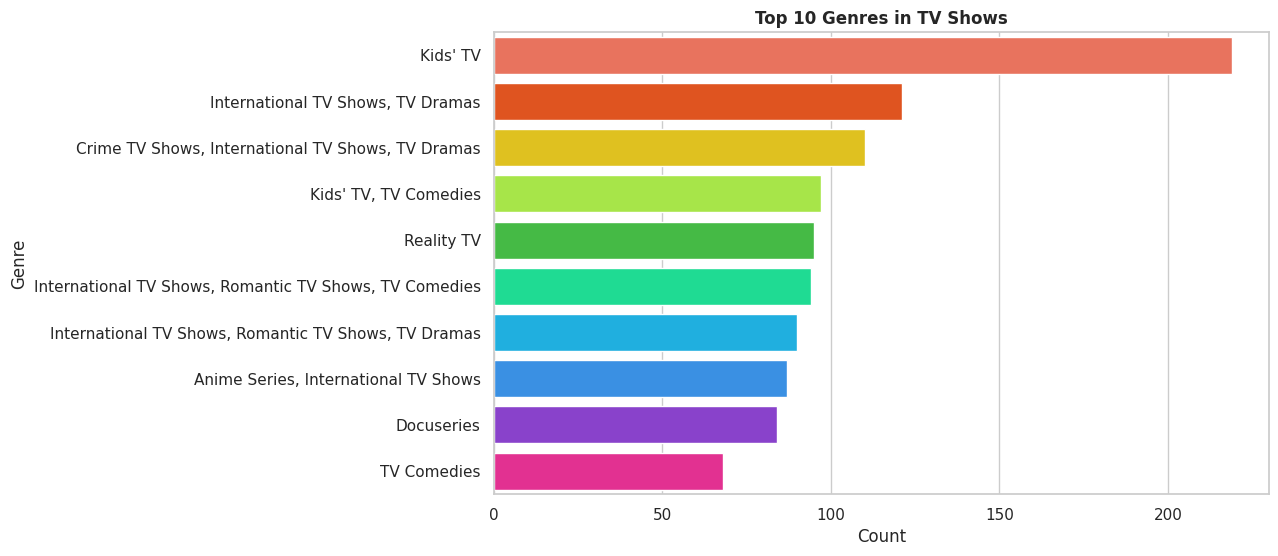

In [67]:
# Define a custom bright color palette
bright_palette = ["#FF6347", "#FF4500", "#FFD700", "#ADFF2F", "#32CD32",
                  "#00FA9A", "#00BFFF", "#1E90FF", "#8A2BE2", "#FF1493"]

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x = df_tv["listed_in"].value_counts().head(10).values,
            y = df_tv["listed_in"].value_counts().head(10).index,
            palette=bright_palette)

plt.xlabel('Count')
plt.ylabel('Genre')
plt.title("Top 10 Genres in TV Shows", fontweight="bold")
plt.show()

* **Kid's TV was the #1 category for TV Shows**

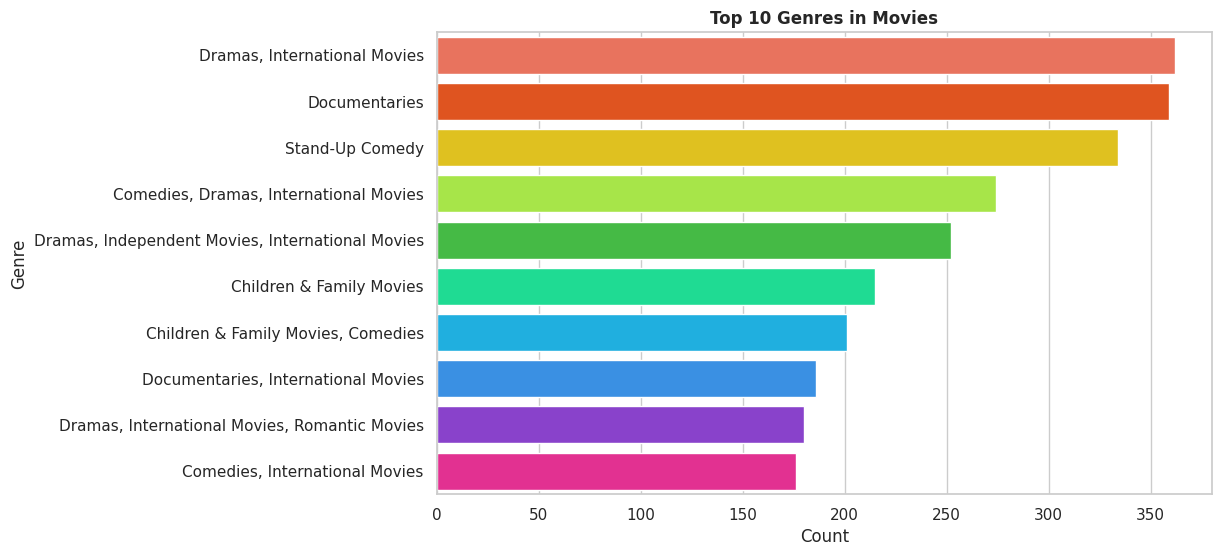

In [68]:
# Define a custom bright color palette
bright_palette = ["#FF6347", "#FF4500", "#FFD700", "#ADFF2F", "#32CD32",
                  "#00FA9A", "#00BFFF", "#1E90FF", "#8A2BE2", "#FF1493"]

# Plotting
plt.figure(figsize=(10,6))  # Adjusted size for better readability
sns.barplot(x = df_movies["listed_in"].value_counts().head(10).values,
            y = df_movies["listed_in"].value_counts().head(10).index,
            palette=bright_palette)

plt.xlabel('Count')
plt.ylabel('Genre')
plt.title("Top 10 Genres in Movies", fontweight="bold")
plt.show()

* **The category 'Dramas,International Movies' took the lead for Movies, with 'Documentaries' following closely behind.**

# Top 20 Countries with the most available content

In [69]:
import plotly.express as px
from collections import Counter

# Data preparation
country_data = nd['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(
    ', ',',').split(',')))).sort_values(ascending=False)
top20country = country_count.head(20)

# Create DataFrame for Plotly
df_top20country = pd.DataFrame({
    'Country': top20country.index,
    'Number of Contents': top20country.values
})

# Define a custom bright color palette
bright_palette = ["#FF6347", "#FF4500", "#FFD700", "#ADFF2F", "#32CD32",
                  "#00FA9A", "#00BFFF", "#1E90FF", "#8A2BE2", "#FF1493",
                  "#FF69B4", "#DDA0DD", "#FF8C00", "#D2691E", "#F0E68C",
                  "#E6E6FA", "#B0E57C", "#FFB6C1", "#B0C4DE", "#F5DEB3"]

# Create an interactive bar plot with Plotly
fig = px.bar(df_top20country,
             x='Country',
             y='Number of Contents',
             color='Number of Contents',
             color_continuous_scale=bright_palette,
             title='Top 20 Countries with the Most Content Available',
             labels={'Number of Contents': 'Number of Contents'},
             text='Number of Contents')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Number of Contents',
    xaxis_tickangle=-45,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    title_font_size=20,  # Increase font size of the title
    title_x=0.5,  # Center the title
    paper_bgcolor='white',  # Background color
    plot_bgcolor='white',   # Plot area color
    yaxis_gridcolor='lightgray' # Grid color
)
# Show figure
fig.show()

* **As expected, USA released the most content, followed by India.**

# Word Cloud of the Top 15 Directors and Cast Members

Most common directors:
Rajiv Chilaka: 22
Jan Suter: 21
Raúl Campos: 19
Suhas Kadav: 16
Jay Karas: 15
Marcus Raboy: 15
Cathy Garcia-Molina: 13
Youssef Chahine: 12
Martin Scorsese: 12
Jay Chapman: 12
Steven Spielberg: 11
Don Michael Paul: 10
David Dhawan: 9
Yılmaz Erdoğan: 9
Shannon Hartman: 9


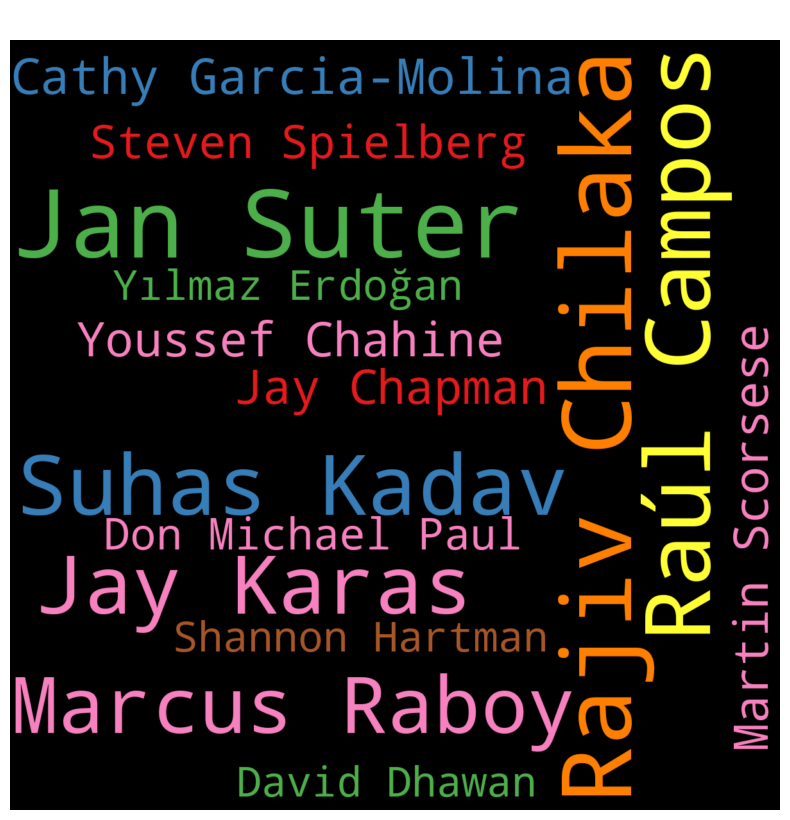

In [70]:
from wordcloud import WordCloud
from collections import Counter

# Data preparation for directors
directors = df_movies['director'].dropna().str.split(',', expand=True).stack()
directors = directors.str.strip()  # Remove any leading/trailing spaces
directors = directors[directors != 'not listed']  # Exclude 'not listed'
director_counts = Counter(directors)

# Print the most common directors and their counts
print("Most common directors:")
for director, count in director_counts.most_common(15):
    print(f"{director}: {count}")

# Get the top 15 most common directors
top_15_directors = dict(director_counts.most_common(15))

# Create the word cloud for directors
wordcloud_directors = WordCloud(background_color='black',
                               colormap='Set1',  # Bright colors
                               width=1200,
                               height=1200,
                               max_words=15,
                               relative_scaling=0.5).generate_from_frequencies(top_15_directors)

# Plot the word cloud for directors
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_directors, interpolation='bilinear')
plt.axis('off')
plt.title('Top 15 Directors', fontsize=20, color='white')
plt.show()

Most common cast members:
Anupam Kher: 42
Shah Rukh Khan: 35
Naseeruddin Shah: 32
Akshay Kumar: 30
Om Puri: 30
Amitabh Bachchan: 28
Julie Tejwani: 28
Paresh Rawal: 28
Rupa Bhimani: 27
Boman Irani: 27
Kareena Kapoor: 25
Samuel L. Jackson: 22
Ajay Devgn: 21
Rajesh Kava: 21
Adam Sandler: 20


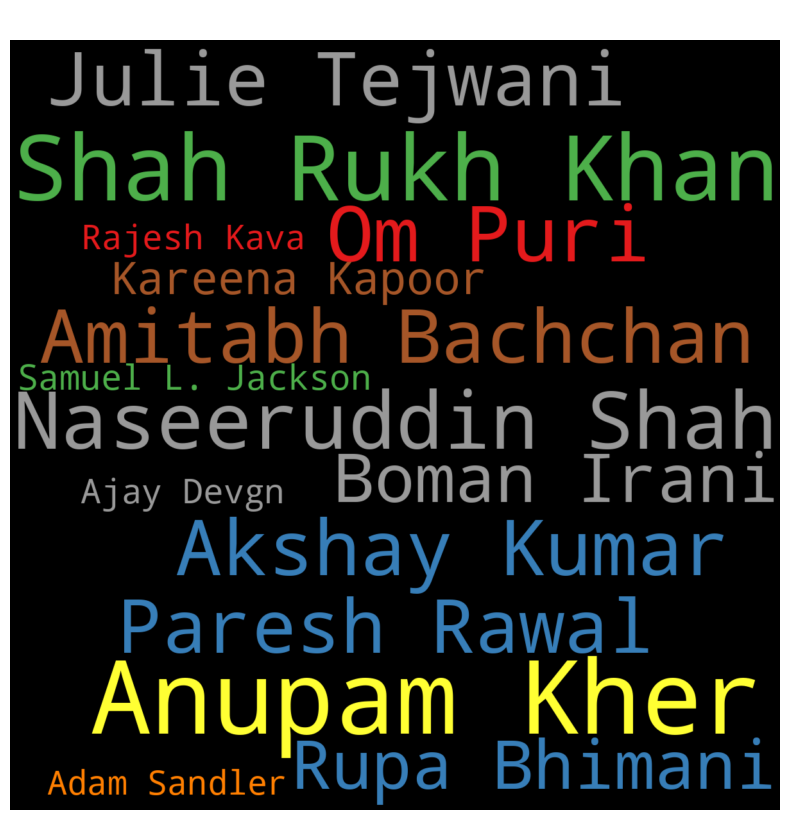

In [71]:
# Data preparation for cast
casts = df_movies['cast'].dropna().str.split(',', expand=True).stack()
casts = casts.str.strip()  # Remove any leading/trailing spaces
casts = casts[casts != 'not listed']  # Exclude 'not listed'
cast_counts = Counter(casts)

# Print the most common cast members and their counts
print("Most common cast members:")
for cast, count in cast_counts.most_common(15):
    print(f"{cast}: {count}")

# Get the top 15 most common cast members
top_15_cast = dict(cast_counts.most_common(15))

# Create the word cloud for cast members
wordcloud_cast = WordCloud(background_color='black',
                          colormap='Set1',  # Bright colors
                          width=1200,
                          height=1200,
                          max_words=15,
                          relative_scaling=0.5).generate_from_frequencies(top_15_cast)

# Plot the word cloud for cast members
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_cast, interpolation='bilinear')
plt.axis('off')
plt.title('Top 15 Cast Members', fontsize=20, color='white')
plt.show()

* **The wordcloud shows the top 15 directors and cast members that were listed the most.**